In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import spearmanr
from sklearn.metrics import f1_score, accuracy_score, precision_score
from utils import masked_aCC, masked_mse
datadir = "/Users/yihyun/Code"

In [24]:
# evaluation of external testing set
# PRISM testing
prism_both = pd.read_csv(os.path.join(datadir, "drug_response_prediction/0.data/processed/prism_test_molGNN_scdrug.csv"), index_col='smiles')
PRISM_pred = pd.read_csv(os.path.join(datadir, "drug_response_prediction/5.Discussion/5_3.parameter_tuning/CaDRReS_SVM_disjoint_pred_tuning.csv"), index_col = 0)
pred_PRISM = np.matrix(PRISM_pred)
label_prism = np.matrix(prism_both)
mask_prism = np.matrix(np.isnan(prism_both)==False, dtype=int)


# GDSC external testing
GDSC2_external_auc = pd.read_csv(os.path.join(datadir, "drug_response_prediction/0.data/processed/GDSC2_external_auc.csv"), index_col = 0)
GDSC2_external_IC50 = pd.read_csv(os.path.join(datadir, "drug_response_prediction/0.data/processed/GDSC2_external_IC50.csv"), index_col = 0)
GDSC_pred = pd.read_csv(os.path.join(datadir, "drug_response_prediction/5.Discussion/5_3.parameter_tuning/CaDRReS_SVM_external_pred_tuning.csv"), index_col = 0)
GDSC2_external_auc = GDSC2_external_auc.loc[GDSC_pred.index.to_list(), GDSC_pred.columns.to_list()]
GDSC2_external_IC50 = GDSC2_external_IC50.loc[GDSC_pred.index.to_list(), GDSC_pred.columns.to_list()]
pred_GDSC = 1-np.matrix(GDSC_pred)
mask_GDSC = np.matrix(GDSC2_external_auc.isna(), dtype=int)
label_GDSC = np.matrix(GDSC2_external_auc)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


0.257450472950269
0.169868999145234


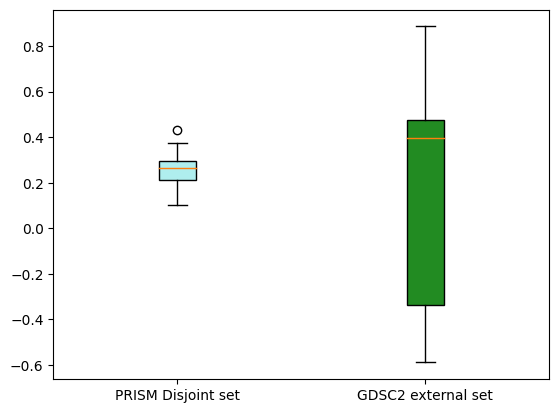

In [30]:
# cell-wise SCC
# evaluation result
GDSC_scc_result = []
for cell_line in GDSC_pred.columns:
    tmp_data = GDSC2_external_IC50.loc[GDSC_pred.index, cell_line].dropna()
    tmp_result = GDSC_pred.loc[tmp_data.index, cell_line]

    scc, scc_p = spearmanr(np.array(tmp_data), 1-np.array(tmp_result))
    GDSC_scc_result.append(scc)
GDSC_scc_result = [val for val in GDSC_scc_result if np.isnan(val)==False]
# evaluation result
PRISM_scc_result = []
for cell_line in PRISM_pred.columns:
    tmp_data = prism_both.loc[PRISM_pred.index, cell_line].dropna()
    tmp_result = PRISM_pred.loc[tmp_data.index, cell_line]


    scc, scc_p = spearmanr(np.array(tmp_data), np.array(tmp_result))
    PRISM_scc_result.append(scc)


print(np.mean(np.array(PRISM_scc_result).flatten()))
print(np.mean(np.array(np.array(GDSC_scc_result)[np.isnan(GDSC_scc_result) == False]).flatten()))

colors_dict={"PRISM Disjoint set": "paleturquoise", "GDSC2 external set": "forestgreen"}

pred_dict = {'PRISM Disjoint set': np.array(PRISM_scc_result),
            'GDSC2 external set': np.array(np.array(GDSC_scc_result)[np.isnan(GDSC_scc_result) == False]).flatten()}
fig, ax = plt.subplots()
box = ax.boxplot(pred_dict.values(), patch_artist=True)
ax.set_xticklabels(pred_dict.keys())
 
colors=[colors_dict[key] for key in pred_dict.keys()]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


0.06562989411871382
0.4423192400966676


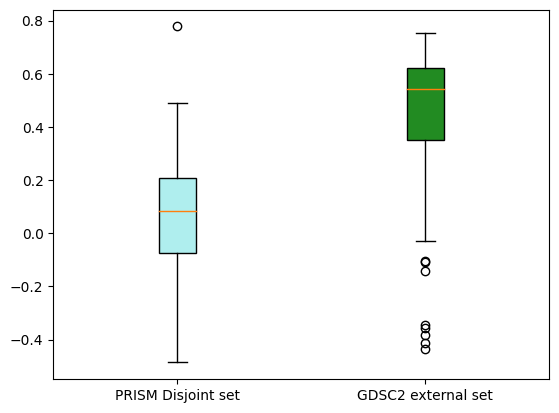

In [31]:
# drug-wise SCC
from scipy.stats import spearmanr
# evaluation result
GDSC_scc_result = []
for smiles in GDSC_pred.index:
    tmp_data = GDSC2_external_IC50.loc[smiles, GDSC_pred.columns].dropna()
    tmp_result = GDSC_pred.loc[smiles, tmp_data.index]

    scc, scc_p = spearmanr(np.array(tmp_data), 1-np.array(tmp_result))
    GDSC_scc_result.append(scc)
GDSC_scc_result = [val for val in GDSC_scc_result if np.isnan(val)==False]
# evaluation result
PRISM_scc_result = []
for smiles in PRISM_pred.index:
    tmp_data = prism_both.loc[smiles, PRISM_pred.columns].dropna()
    tmp_result = PRISM_pred.loc[smiles, tmp_data.index]

    scc, scc_p = spearmanr(np.array(tmp_data), np.array(tmp_result))
    PRISM_scc_result.append(scc)
PRISM_scc_result = [scc for scc in PRISM_scc_result if np.isnan(scc)==False]

print(np.mean(np.array(PRISM_scc_result).flatten()))
print(np.mean(np.array(np.array(GDSC_scc_result)[np.isnan(GDSC_scc_result) == False]).flatten()))

colors_dict={"PRISM Disjoint set": "paleturquoise", "GDSC2 external set": "forestgreen"}

pred_dict = {'PRISM Disjoint set': np.array(PRISM_scc_result),
            'GDSC2 external set': np.array(np.array(GDSC_scc_result)[np.isnan(GDSC_scc_result) == False]).flatten()}
fig, ax = plt.subplots()
box = ax.boxplot(pred_dict.values(), patch_artist=True)
ax.set_xticklabels(pred_dict.keys())
 
colors=[colors_dict[key] for key in pred_dict.keys()]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

In [34]:
# categories evaluation
## drug wise F1
### PRISM
prism_f1 = []
prism_precision = []
prism_recall = []
for mol in prism_both.index:
    cl_data = prism_both.loc[mol].dropna().values
    cl_pred = PRISM_pred.loc[mol][prism_both.loc[mol].isna() == False].values
    gt = []
    for val in cl_data:
        if val >= 0.6:
            gt.append("potential")
        elif val <= 0.2:
            gt.append("inacitve")
        else:
            gt.append("unclear")
    pred = []
    for val in cl_pred:
        if val >= 0.6:
            pred.append("potential")
        elif val <= 0.2:
            pred.append("inacitve")
        else:
            pred.append("unclear")
    prism_f1.append(f1_score(gt, pred, average='micro'))
    prism_precision.append(precision_score(gt, pred, average='micro'))
    prism_recall.append(accuracy_score(gt, pred))

### GDSC2 external testing
GDSC_f1 = []
GDSC_precision = []
GDSC_recall = []
for mol in GDSC_pred.index:
    cl_data = 1-(GDSC2_external_auc.loc[mol].dropna().values)
    cl_pred = GDSC_pred.loc[mol][GDSC2_external_auc.loc[mol].isna() == False].values
    gt = []
    for val in cl_data:
        if val >= 0.6:
            gt.append("potential")
        elif val <= 0.2:
            gt.append("inacitve")
        else:
            gt.append("unclear")
    pred = []
    for val in cl_pred:
        if val >= 0.6:
            pred.append("potential")
        elif val <= 0.2:
            pred.append("inacitve")
        else:
            pred.append("unclear")
    GDSC_f1.append(f1_score(gt, pred, average='micro'))
    GDSC_precision.append(precision_score(gt, pred, average='micro'))
    GDSC_recall.append(accuracy_score(gt, pred))

0.6516286836563931
0.3598777352298489


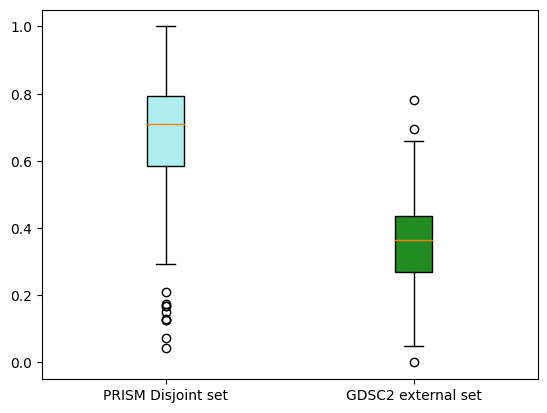

In [35]:
# drug-wise F1 boxplot
print(np.mean(np.array(prism_f1)))
print(np.mean(np.array(GDSC_f1)))
colors_dict={"PRISM Disjoint set": "paleturquoise", "GDSC2 external set": "forestgreen"}

pred_dict = {'PRISM Disjoint set': np.array(prism_f1),
            'GDSC2 external set': np.array(GDSC_f1),}
fig, ax = plt.subplots()
box = ax.boxplot(pred_dict.values(), patch_artist=True)
ax.set_xticklabels(pred_dict.keys())
 
colors=[colors_dict[key] for key in pred_dict.keys()]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

In [36]:
## cell-wise F1
### PRISM disjoint testing
prism_f1 = []
prism_precision = []
prism_recall = []
for cell_line in prism_both.columns:
    cl_data = prism_both[cell_line].dropna().values
    cl_pred = PRISM_pred[cell_line][prism_both[cell_line].isna() == False].values
    gt = []
    for val in cl_data:
        if val >= 0.6:
            gt.append("potential")
        elif val <= 0.2:
            gt.append("inacitve")
        else:
            gt.append("unclear")
    pred = []
    for val in cl_pred:
        if val >= 0.6:
            pred.append("potential")
        elif val <= 0.2:
            pred.append("inacitve")
        else:
            pred.append("unclear")
    prism_f1.append(f1_score(gt, pred, average='micro'))
    prism_precision.append(precision_score(gt, pred, average='micro'))
    prism_recall.append(accuracy_score(gt, pred))

### GDSC2 external testing
GDSC_f1 = []
GDSC_precision = []
GDSC_recall = []
for cell_line in GDSC_pred.columns:
    cl_data = 1-(GDSC2_external_auc[cell_line].dropna().values)
    cl_pred = GDSC_pred[cell_line][GDSC2_external_auc[cell_line].isna() == False].values
    gt = []
    for val in cl_data:
        if val >= 0.6:
            gt.append("potential")
        elif val <= 0.2:
            gt.append("inacitve")
        else:
            gt.append("unclear")
    pred = []
    for val in cl_pred:
        if val >= 0.6:
            pred.append("potential")
        elif val <= 0.2:
            pred.append("inacitve")
        else:
            pred.append("unclear")
    GDSC_f1.append(f1_score(gt, pred, average='micro'))
    GDSC_precision.append(precision_score(gt, pred, average='micro'))
    GDSC_recall.append(accuracy_score(gt, pred))

0.6501843428912897
0.3449244402946048


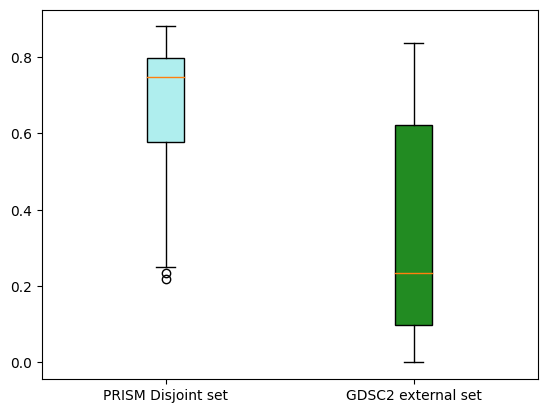

In [37]:
# cell-wise F1 boxplot
print(np.mean(np.array(prism_f1)))
print(np.mean(np.array(GDSC_f1)))
colors_dict={"PRISM Disjoint set": "paleturquoise", "GDSC2 external set": "forestgreen"}

pred_dict = {'PRISM Disjoint set': np.array(prism_f1),
            'GDSC2 external set': np.array(GDSC_f1),}
fig, ax = plt.subplots()
box = ax.boxplot(pred_dict.values(), patch_artist=True)
ax.set_xticklabels(pred_dict.keys())
 
colors=[colors_dict[key] for key in pred_dict.keys()]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()